In [27]:

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from graphviz import Source
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np  


data_path = 'songs.csv'
songs = pd.read_csv(data_path)


y = songs.pop('popularity')
X = songs

categorical_columns = [cname for cname in X.columns if X[cname].dtype == "object"]
numerical_columns = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


models = {
    'rf_model_1': RandomForestRegressor(n_estimators=100, random_state=42),
    'rf_model_2': RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    'rf_model_3': RandomForestRegressor(n_estimators=300, max_features='sqrt', random_state=42)
}


results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calcular RMSE
    results[name] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse}


for name, metrics in results.items():
    print(f"{name} - MSE: {metrics['MSE']}, MAE: {metrics['MAE']}, RMSE: {metrics['RMSE']}")


rf_model_1 - MSE: 481.543991625, MAE: 13.009364999999999, RMSE: 21.944110636455513
rf_model_2 - MSE: 461.5423274990591, MAE: 14.280289028056083, RMSE: 21.48353619633088
rf_model_3 - MSE: 456.7644600785185, MAE: 13.233358888888889, RMSE: 21.37204857000186


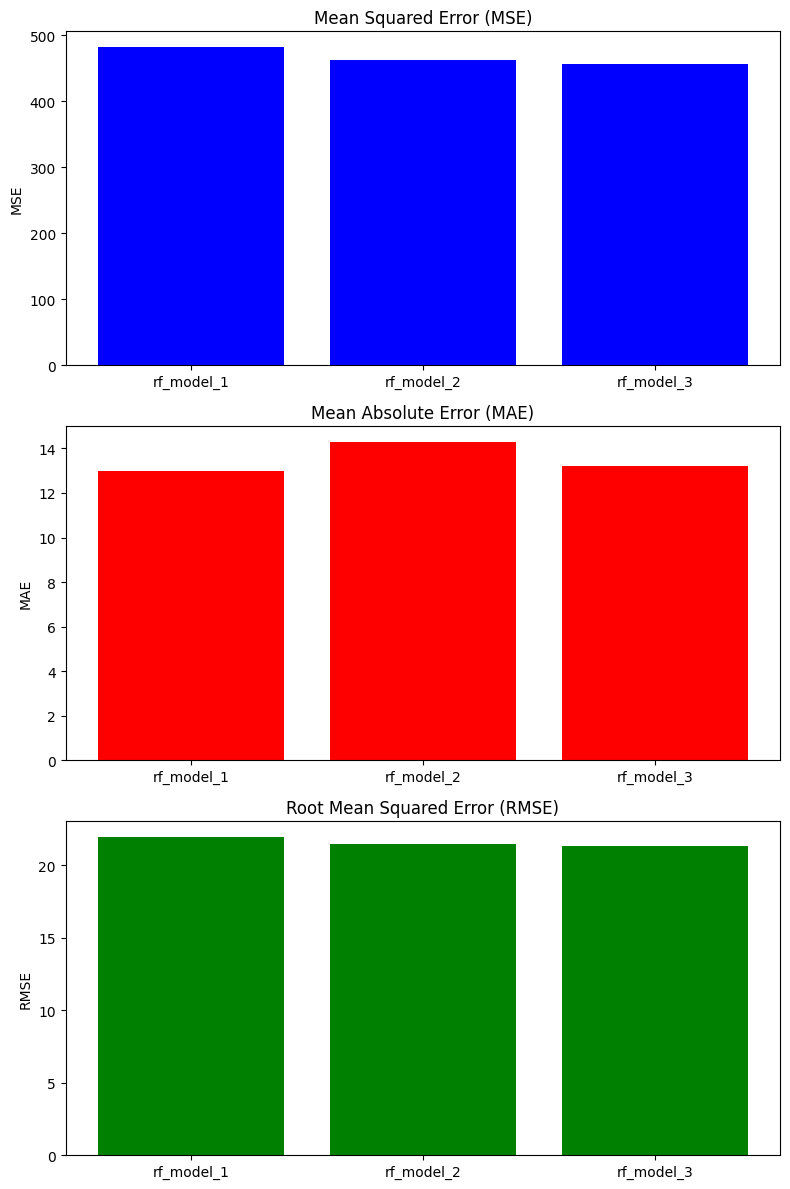

In [38]:
import matplotlib.pyplot as plt

model_names = ['rf_model_1', 'rf_model_2', 'rf_model_3']


mse_values = [481.543991625, 461.5423274990591, 456.7644600785185]
mae_values = [13.009364999999999, 14.280289028056083, 13.233358888888889]
rmse_values = [21.944110636455513, 21.48353619633088, 21.37204857000186]

fig, axs = plt.subplots(3, 1, figsize=(8, 12))


axs[0].bar(model_names, mse_values, color='blue')
axs[0].set_title('Mean Squared Error (MSE)')
axs[0].set_ylabel('MSE')

axs[1].bar(model_names, mae_values, color='red')
axs[1].set_title('Mean Absolute Error (MAE)')
axs[1].set_ylabel('MAE')


axs[2].bar(model_names, rmse_values, color='green')
axs[2].set_title('Root Mean Squared Error (RMSE)')
axs[2].set_ylabel('RMSE')


plt.tight_layout()
plt.show()
